
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] "Tarih"               "TP BRENTPETROL EUBP" "TP ODEMGZS GTOPLAM" 
[4] "TP DK USD A YTL"

      Date            Dolar.Price.of.Brent.Petrol Number.of.Tourists
 Min.   :2018-01-01   Min.   :14.85               Min.   :  50630   
 1st Qu.:2018-12-24   1st Qu.:54.27               1st Qu.:1323106   
 Median :2019-12-16   Median :65.97               Median :2033064   
 Mean   :2019-12-16   Mean   :61.85               Mean   :2511338   
 3rd Qu.:2020-12-08   3rd Qu.:73.63               3rd Qu.:3791359   
 Max.   :2021-12-01   Max.   :83.10               Max.   :7018257   
      USD        
 Min.   : 3.772  
 1st Qu.: 5.579  
 Median : 6.047  
 Mean   : 6.583  
 3rd Qu.: 7.651  
 Max.   :13.528  

'data.frame':	48 obs. of  4 variables:
 $ Date                       : Date, format: "2018-01-01" "2018-02-01" ...
 $ Dolar.Price.of.Brent.Petrol: num  67.8 66.1 69 75.9 76.5 ...
 $ Number.of.Tourists         : num  1601862 1444008 1862961 2433008 3398215 ...
 $ USD                        : num  3.77 3.78 3.88 4.05 4.41 ...


      Date                 Data      
 Min.   :2018-01-01   Min.   : 5.50  
 1st Qu.:2018-12-24   1st Qu.:27.00  
 Median :2019-12-16   Median :35.88  
 Mean   :2019-12-16   Mean   :36.64  
 3rd Qu.:2020-12-08   3rd Qu.:45.62  
 Max.   :2021-12-01   Max.   :69.00  

'data.frame':	48 obs. of  2 variables:
 $ Date: Date, format: "2018-01-01" "2018-02-01" ...
 $ Data: num  34.8 28.5 36 44.6 47.5 ...


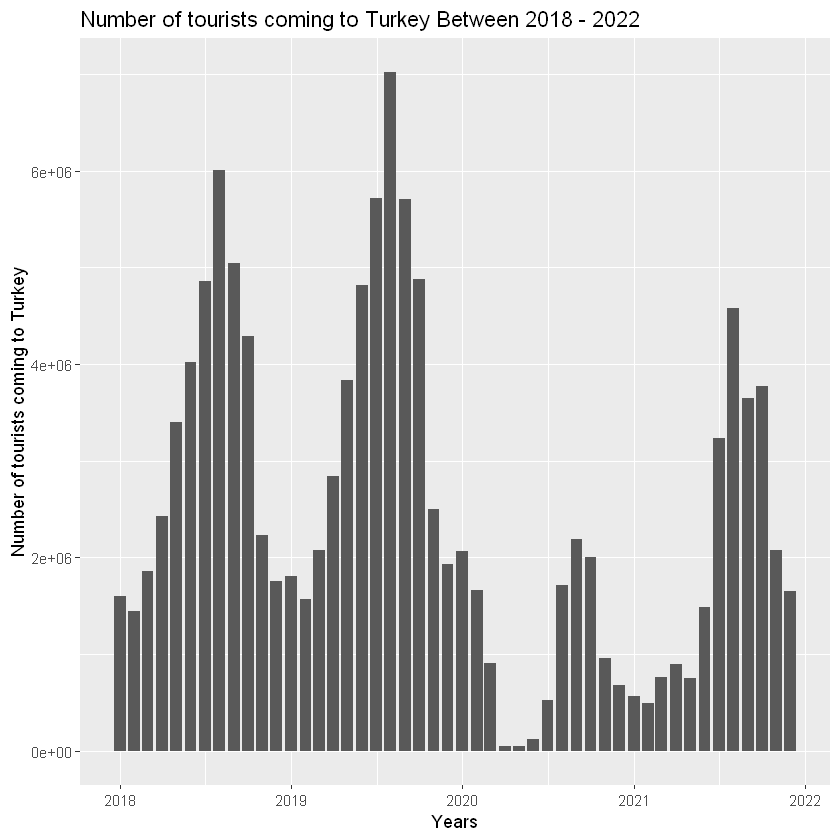

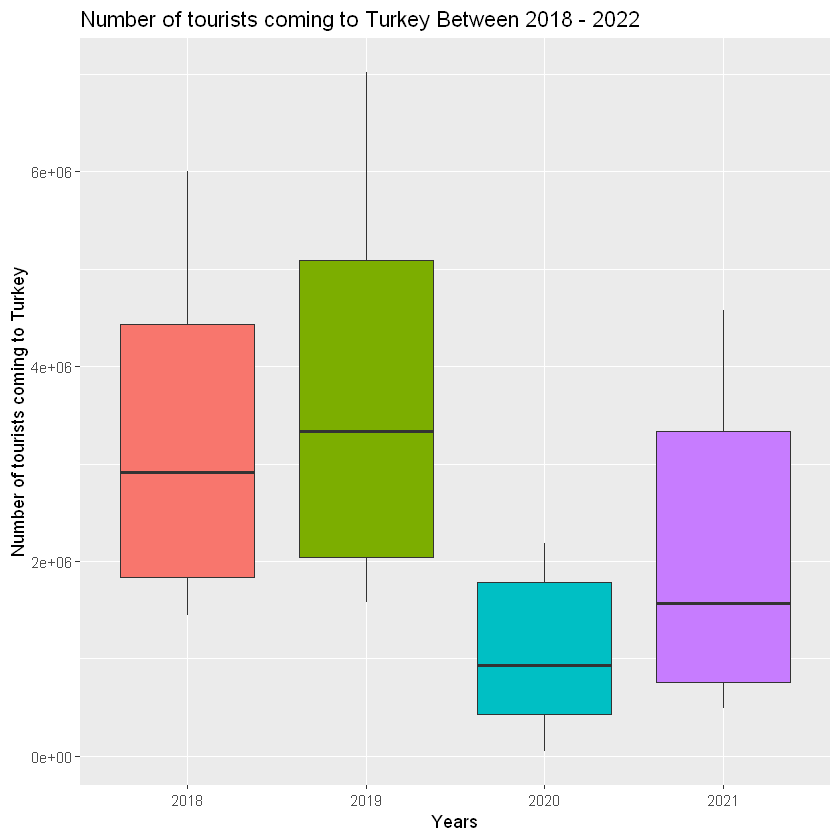

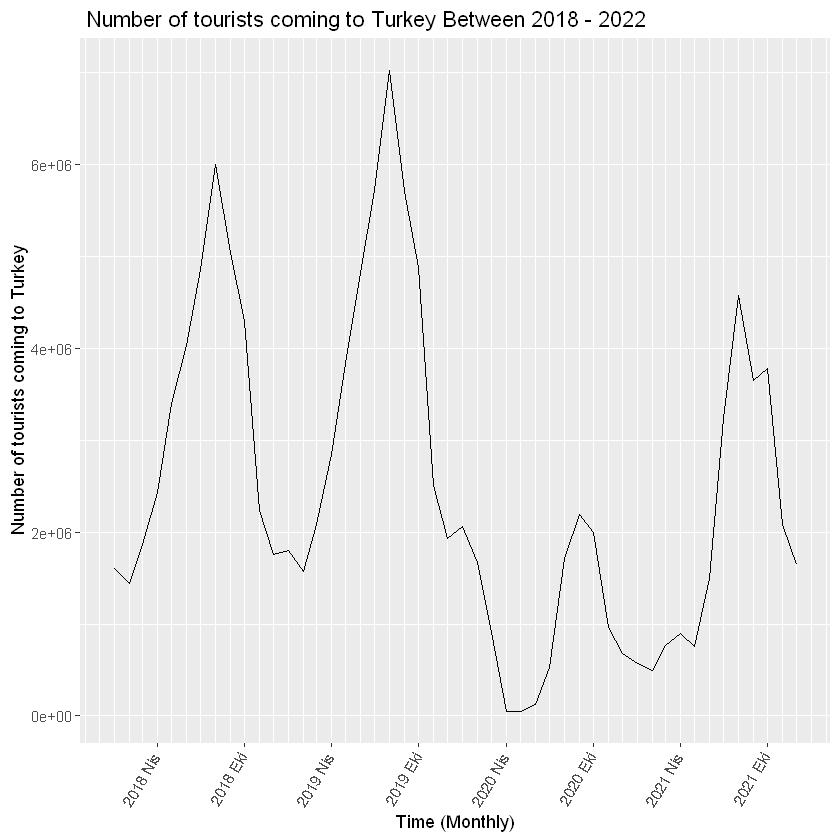

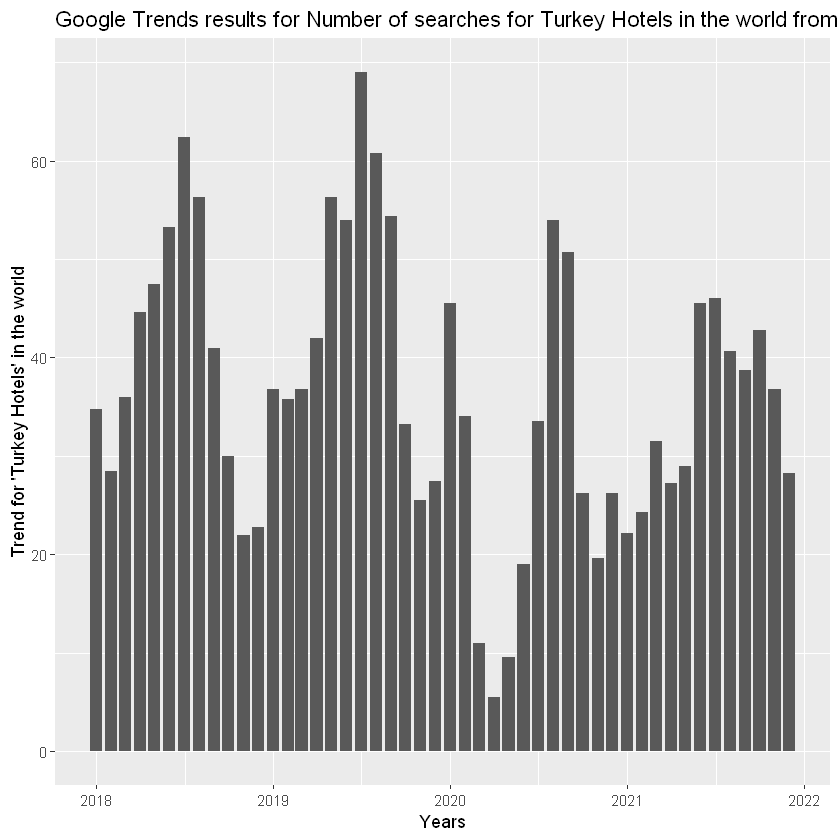

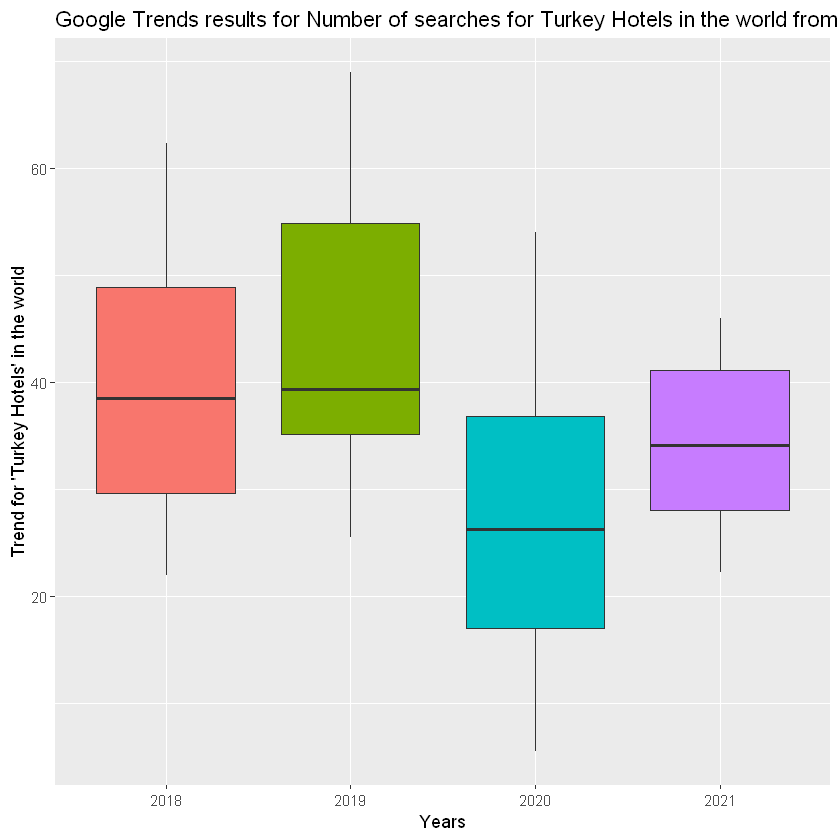

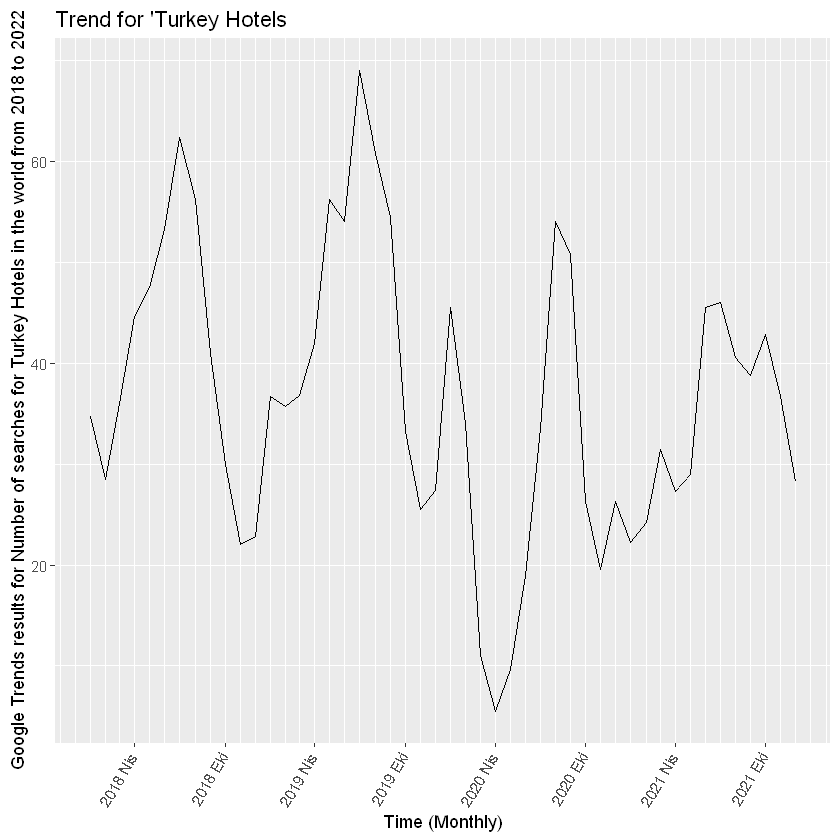

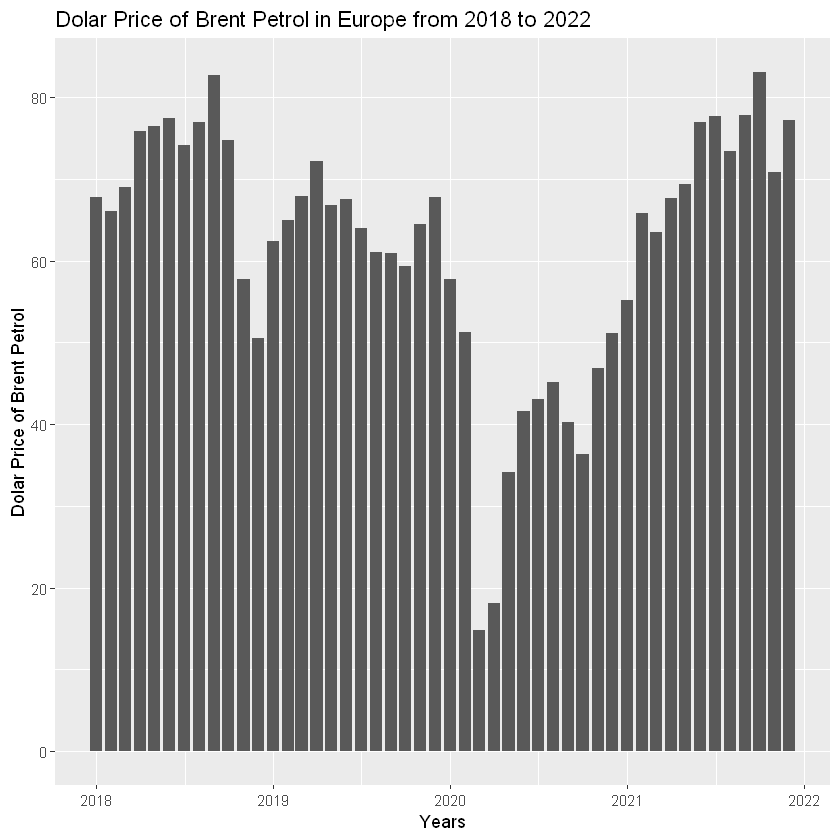

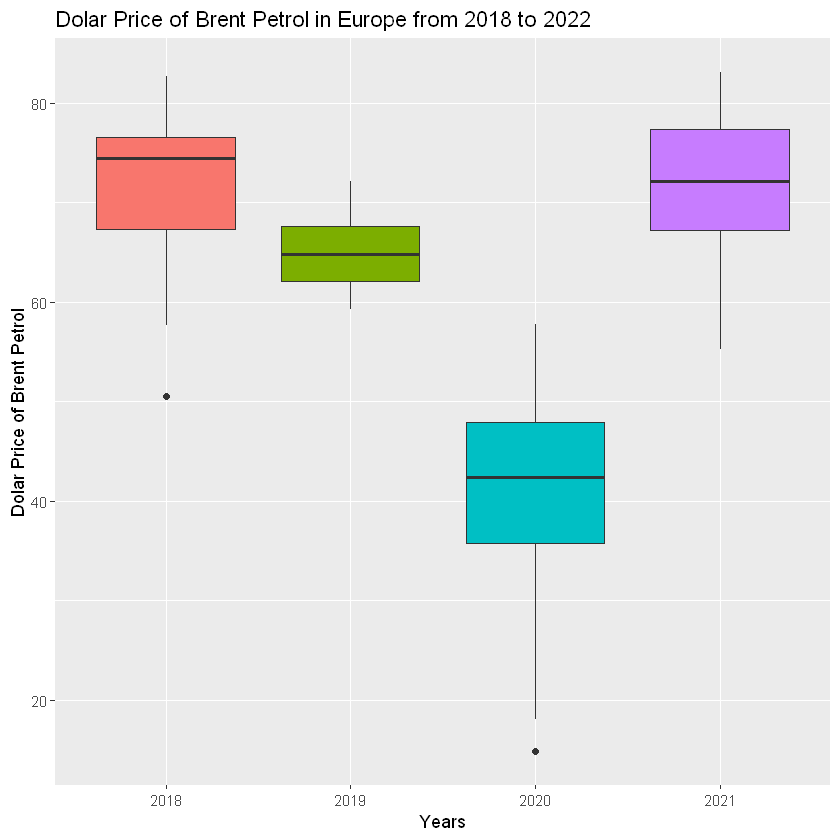

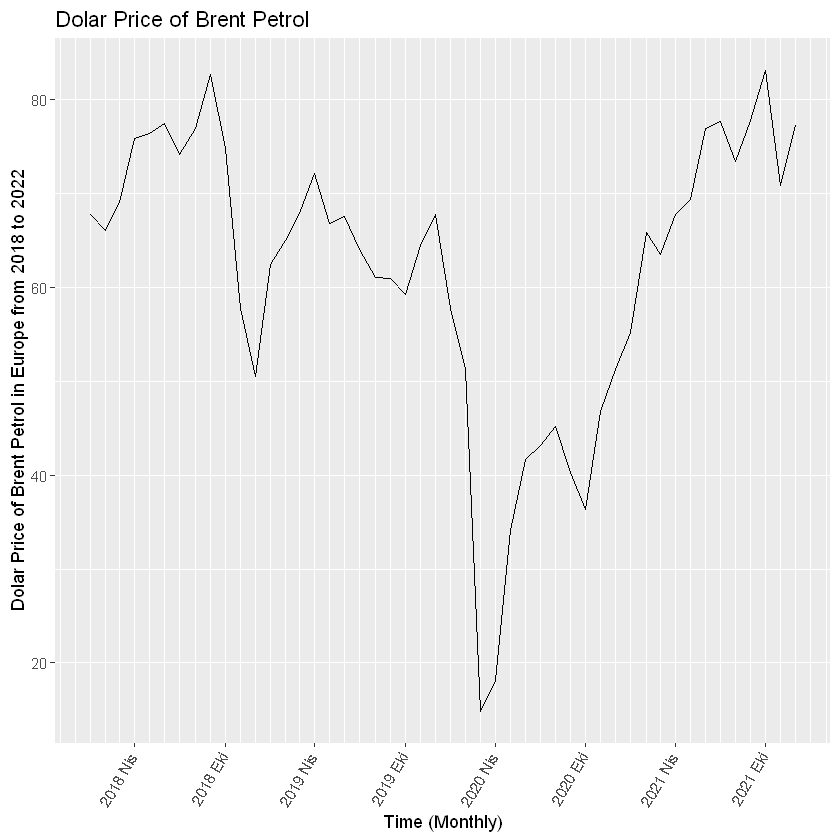

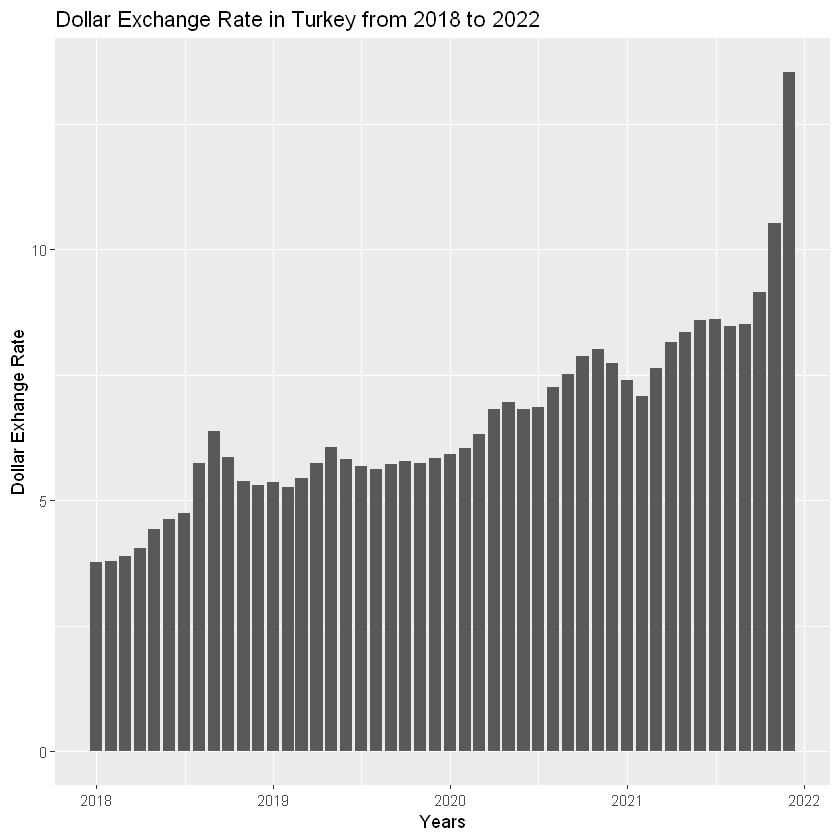

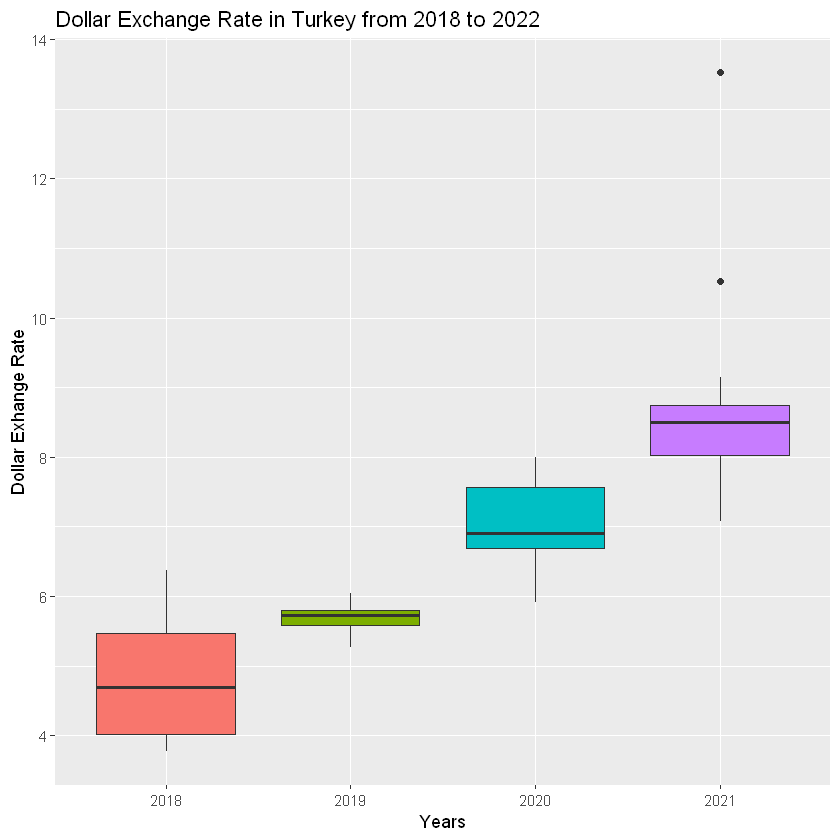

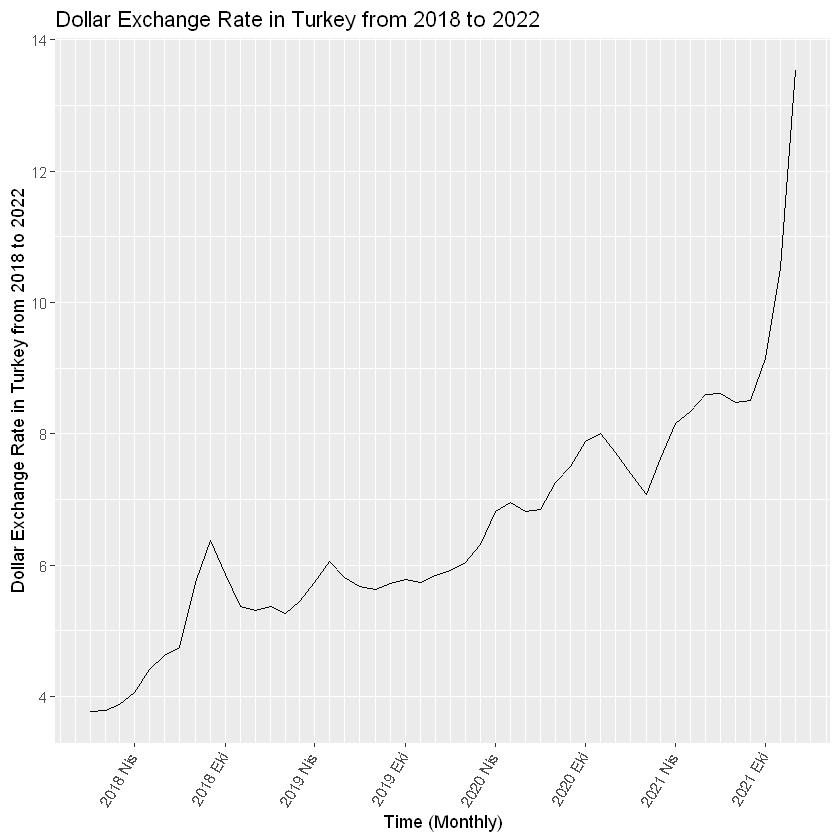

In [1]:
library(zoo)
library(lubridate)
library(ggplot2)
library(dplyr)
library(readxl)

EVDS<-read_excel("C:/Users/devri/Downloads/EVDS.xlsx")
names(EVDS)
EVDS.data<-data.frame(EVDS[1:48,])

Search_data<-read.csv("C:/Users/devri/Downloads/Multitimeline.csv",header = F)
Search_data<-Search_data[41:248,]

################################################################################################################################


EVDS.data$TP.BRENTPETROL.EUBP<-as.numeric(EVDS.data$TP.BRENTPETROL.EUBP)
EVDS.data$Tarih<-as.Date(as.yearmon(EVDS.data$Tarih))
EVDS.data$TP.ODEMGZS.GTOPLAM<-as.numeric(EVDS.data$TP.ODEMGZS.GTOPLAM)
EVDS.data$TP.DK.USD.A.YTL<-as.numeric(EVDS.data$TP.DK.USD.A.YTL)
colnames(EVDS.data)<-c("Date","Dolar.Price.of.Brent.Petrol","Number.of.Tourists","USD")
summary(EVDS.data)
str(EVDS.data)

data_trends<-data.frame(Search_data)
colnames(data_trends)<-c("Date","Data")
data_trends$Data<-as.numeric(data_trends$Data)
data_trends$Date<-as.Date((data_trends$Date))
data_trends$month<-floor_date(data_trends$Date,"month")
google_trends<-data_trends %>%
  group_by(month) %>%
  summarize(mean = mean(Data)) %>%
  as.data.frame()
colnames(google_trends)<-c("Date","Data")
summary(google_trends)
str(google_trends)

################################################################################################################################


ggplot(EVDS.data,aes(x=Date,y=Number.of.Tourists))+ geom_bar(stat='identity')+
  xlab("Years") + ylab("Number of tourists coming to Turkey")+ ggtitle("Number of tourists coming to Turkey Between 2018 - 2022")

ggplot(EVDS.data,aes(x=factor(year(Date)),y=Number.of.Tourists))+ geom_boxplot(aes(fill=factor(year(Date))))+ 
  xlab("Years") + ylab("Number of tourists coming to Turkey")+ ggtitle("Number of tourists coming to Turkey Between 2018 - 2022")+
  theme(legend.position = "none")

EVDS.data %>%
  ggplot(aes(x= Date, y = Number.of.Tourists)) +
  geom_line(color = 1) + 
  labs(title = " Number of tourists coming to Turkey Between 2018 - 2022", x = "Time (Monthly)", y = "Number of tourists coming to Turkey") +
  scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "1 month") + 
  theme(axis.text.x=element_text(angle=60, hjust=1.4, vjust = 1.4))

################################################################################################################################

ggplot(google_trends,aes(x=Date,y=Data))+ geom_bar(stat='identity')+ 
  xlab("Years") + ylab("Trend for 'Turkey Hotels' in the world")+ ggtitle("Google Trends results for Number of searches for Turkey Hotels in the world from 2018 to 2022")

ggplot(google_trends,aes(x=factor(year(Date)),y=Data))+ geom_boxplot(aes(fill=factor(year(Date))))+ 
  xlab("Years") + ylab("Trend for 'Turkey Hotels' in the world")+ ggtitle("Google Trends results for Number of searches for Turkey Hotels in the world from 2018 to 2022")+
  theme(legend.position = "none")

google_trends %>%
  ggplot(aes(x= Date, y = Data)) +
  geom_line(color = 1) + 
  labs(title = "Trend for 'Turkey Hotels", x = "Time (Monthly)", y = "Google Trends results for Number of searches for Turkey Hotels in the world from 2018 to 2022") +
  scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "1 month") + 
  theme(axis.text.x=element_text(angle=60, hjust=1.4, vjust = 1.4))

################################################################################################################################

ggplot(EVDS.data,aes(x=Date,y=Dolar.Price.of.Brent.Petrol))+ geom_bar(stat='identity')+ 
  xlab("Years") + ylab("Dolar Price of Brent Petrol")+ ggtitle("Dolar Price of Brent Petrol in Europe from 2018 to 2022")

ggplot(EVDS.data,aes(x=factor(year(Date)),y=Dolar.Price.of.Brent.Petrol))+ geom_boxplot(aes(fill=factor(year(Date))))+ 
  xlab("Years") + ylab("Dolar Price of Brent Petrol")+ ggtitle("Dolar Price of Brent Petrol in Europe from 2018 to 2022")+
  theme(legend.position = "none")

EVDS.data %>%
  ggplot(aes(x= Date, y = Dolar.Price.of.Brent.Petrol)) +
  geom_line(color = 1) + 
  labs(title = "Dolar Price of Brent Petrol", x = "Time (Monthly)", y = "Dolar Price of Brent Petrol in Europe from 2018 to 2022") +
  scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "1 month") + 
  theme(axis.text.x=element_text(angle=60, hjust=1.4, vjust = 1.4))

###############################################################################################################################

ggplot(EVDS.data,aes(x=Date,y=USD))+ geom_bar(stat='identity')+
  xlab("Years") + ylab("Dollar Exhange Rate")+ ggtitle("Dollar Exchange Rate in Turkey from 2018 to 2022")

ggplot(EVDS.data,aes(x=factor(year(Date)),y=USD))+ geom_boxplot(aes(fill=factor(year(Date))))+ 
  xlab("Years") + ylab("Dollar Exhange Rate")+ ggtitle("Dollar Exchange Rate in Turkey from 2018 to 2022")+
  theme(legend.position = "none")

EVDS.data %>%
  ggplot(aes(x= Date, y = USD)) +
  geom_line(color = 1) + 
  labs(title = "Dollar Exchange Rate in Turkey from 2018 to 2022", x = "Time (Monthly)", y = "Dollar Exchange Rate in Turkey from 2018 to 2022") +
  scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "1 month") + 
  theme(axis.text.x=element_text(angle=60, hjust=1.4, vjust = 1.4))
